In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
base_dir = "/content/drive/MyDrive/find_the_niche/"
df = pd.read_csv(f'{base_dir}/Dashcam front and rear Helium 10 Export.csv')
df.head()

,Display Order,Product Details,ASIN,URL,Image URL,Brand,Price $,Parent Level Sales,ASIN Sales,Recent Purchases,...,Size Tier,Fulfillment,Dimensions,Weight,ABA Most Clicked,Creation Date,Sponsored,Best Seller,Seller Age (mo),Seller
0,1.0,Vantrue N5 4 Channel WiFi 360° All Sides Dash ...,B0C58H2CSP,https://www.amazon.com/dp/B0C58H2CSP?psc=1,https://m.media-amazon.com/images/I/71+xgHE33y...,VANTRUE,399.99,"1,659","1,566","1,000",...,Large Standard-Size,FBA,7.48 x 3.82 x 5.63 in,2.29,NaN,"Oct 11, 2023",Sponsored Brand,No,20,VANTRUE
1,2.0,"Vantrue E2 Dash Cam Front and Rear, 2.7K Upgra...",B0B6B6RQT1,https://www.amazon.com/dp/B0B6B6RQT1?psc=1,https://m.media-amazon.com/images/I/71FFOuv9kC...,VANTRUE,195.99,559,557,400,...,Large Standard-Size,FBA,5.67 x 3.98 x 5.31 in,1.98,NaN,"Aug 4, 2022",Sponsored Brand,No,34,VANTRUE
2,3.0,Vantrue E1 Lite 1080P WiFi Mini Dash Cam with ...,B0BGGGG4VW,https://www.amazon.com/dp/B0BGGGG4VW?psc=1,https://m.media-amazon.com/images/I/71M4EZ0Pme...,VANTRUE,71.97,"1,013",866,500,...,Large Standard-Size,FBA,5.39 x 2.44 x 5.16 in,0.86,NaN,"Nov 1, 2022",Sponsored Brand,No,31,VANTRUE
3,4.0,"($) 4K Dash Cam Front and Rear, 170° Ultra Wid...",B0CVXGGHVV,https://www.amazon.com/dp/B0CVXGGHVV?psc=1,https://m.media-amazon.com/images/I/41m-LsiTM5...,BOTSLAB,99.47,"1,468","1,441","1,000",...,Large Standard-Size,FBA,6.02 x 3.90 x 5.39 in,1.57,NaN,"Feb 22, 2024",Sponsored,No,16,Botslab Security
4,5.0,"($) VANTRUE N4 3 Channel Dash Cam, 4K+1080P Du...",B083V6K8RH,https://www.amazon.com/dp/B083V6K8RH?psc=1,https://m.media-amazon.com/images/I/71a0J+8FRk...,VANTRUE,259.99,"1,973","1,973","1,000",...,Large Standard-Size,FBA,5.71 x 4.29 x 5.31 in,1.98,NaN,"Jan 21, 2020",Sponsored,No,65,VANTRUE


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Display Order          35 non-null     float64
 1   Product Details        35 non-null     object 
 2   ASIN                   35 non-null     object 
 3   URL                    35 non-null     object 
 4   Image URL              35 non-null     object 
 5   Brand                  35 non-null     object 
 6   Price  $               35 non-null     float64
 7   Parent Level Sales     35 non-null     object 
 8   ASIN Sales             35 non-null     object 
 9   Recent Purchases       34 non-null     object 
 10  Parent Level Revenue   35 non-null     object 
 11  ASIN Revenue           35 non-null     object 
 12  Title Char. Count      35 non-null     int64  
 13  BSR                    35 non-null     object 
 14  Seller Country/Region  34 non-null     object 
 15  Fees  $ 

In [39]:
excluded_columns = ['Display Order', 'Image URL', 'Parent Level Sales','Parent Level Revenue','Dimensions','Weight','ABA Most Clicked','Creation Date']
df = df.drop(columns=excluded_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        35 non-null     object 
 1   ASIN                   35 non-null     object 
 2   URL                    35 non-null     object 
 3   Brand                  35 non-null     object 
 4   Price  $               35 non-null     float64
 5   ASIN Sales             35 non-null     object 
 6   Recent Purchases       34 non-null     object 
 7   ASIN Revenue           35 non-null     object 
 8   Title Char. Count      35 non-null     int64  
 9   BSR                    35 non-null     object 
 10  Seller Country/Region  34 non-null     object 
 11  Fees  $                35 non-null     float64
 12  Active Sellers         35 non-null     int64  
 13  Ratings                35 non-null     float64
 14  Review Count           35 non-null     object 
 15  Images  

In [40]:
columns_to_convert = ['ASIN Sales', 'Recent Purchases', 'ASIN Revenue', 'BSR', 'Review Count', 'Review velocity']

for column in columns_to_convert:
  # Replace 'N/A' with np.nan (NaN represents null in pandas)
  df[column] = df[column].replace('N/A', np.nan)
  # Remove commas from the string values
  df[column] = df[column].astype(str).str.replace(',', '', regex=False)
  # Convert to float, coercing errors to NaN
  df[column] = pd.to_numeric(df[column], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        35 non-null     object 
 1   ASIN                   35 non-null     object 
 2   URL                    35 non-null     object 
 3   Brand                  35 non-null     object 
 4   Price  $               35 non-null     float64
 5   ASIN Sales             35 non-null     int64  
 6   Recent Purchases       34 non-null     float64
 7   ASIN Revenue           35 non-null     float64
 8   Title Char. Count      35 non-null     int64  
 9   BSR                    35 non-null     int64  
 10  Seller Country/Region  34 non-null     object 
 11  Fees  $                35 non-null     float64
 12  Active Sellers         35 non-null     int64  
 13  Ratings                35 non-null     float64
 14  Review Count           35 non-null     int64  
 15  Images  

In [41]:
# Fill empty 'Category' with 'Unknown'
df['Category'] = df['Category'].fillna('Unknown')

# Group by 'Category' and sum 'ASIN Revenue'
category_revenue = df.groupby('Category')['ASIN Revenue'].sum().reset_index()

# Print the result
category_revenue

,Category,ASIN Revenue
0,Electronics,19710492.97


There's only one category for this dataset.

In [42]:
df.describe()

,Price $,ASIN Sales,Recent Purchases,ASIN Revenue,Title Char. Count,BSR,Fees $,Active Sellers,Ratings,Review Count,Images,Review velocity,Seller Age (mo)
count,35.000000,35.000000,34.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,27.000000,35.000000
mean,181.000857,3821.771429,2688.235294,5.631569e+05,192.342857,2757.542857,19.586571,2.571429,4.434286,3478.542857,8.542857,162.962963,22.771429
std,126.539012,4459.515293,3096.015495,5.379874e+05,7.526201,3644.062765,10.512357,2.581446,0.223532,4928.996798,0.780002,223.642139,17.936302
min,49.940000,224.000000,200.000000,1.207868e+04,169.000000,22.000000,6.470000,1.000000,4.200000,69.000000,6.000000,16.000000,0.000000
25%,70.980000,1441.000000,1000.000000,1.598618e+05,188.500000,647.000000,11.330000,1.000000,4.300000,843.000000,8.000000,49.500000,9.500000
50%,129.990000,1874.000000,1000.000000,4.796863e+05,192.000000,1818.000000,14.250000,2.000000,4.400000,1472.000000,9.000000,57.000000,20.000000
75%,259.990000,5290.000000,4000.000000,6.417108e+05,199.000000,2201.000000,26.570000,2.500000,4.500000,2683.500000,9.000000,116.000000,28.500000
max,399.990000,15324.000000,10000.000000,1.803583e+06,200.000000,17349.000000,38.040000,12.000000,5.000000,16595.000000,9.000000,703.000000,65.000000


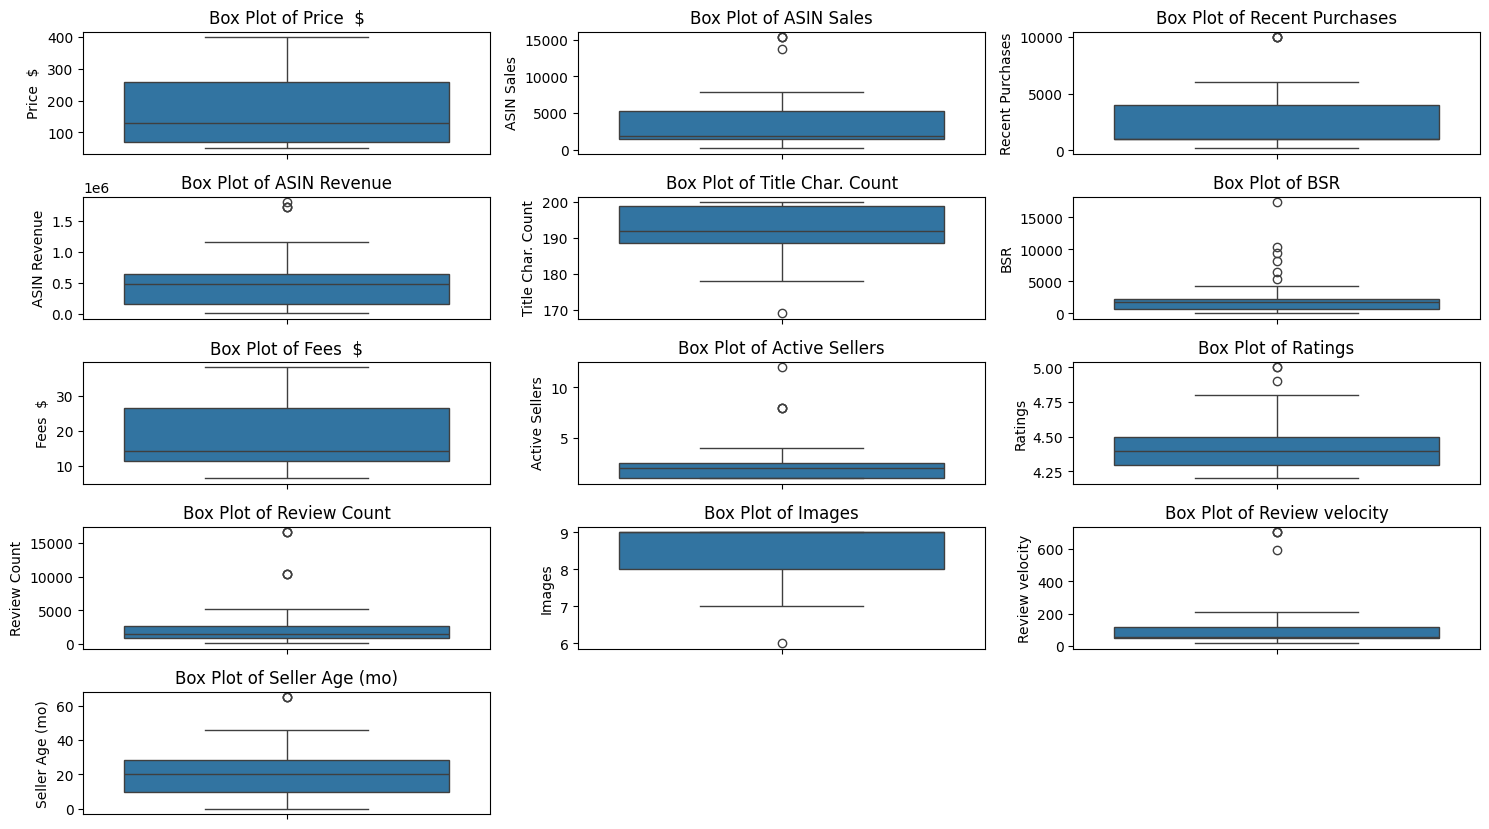

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns (float64 and int64)
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

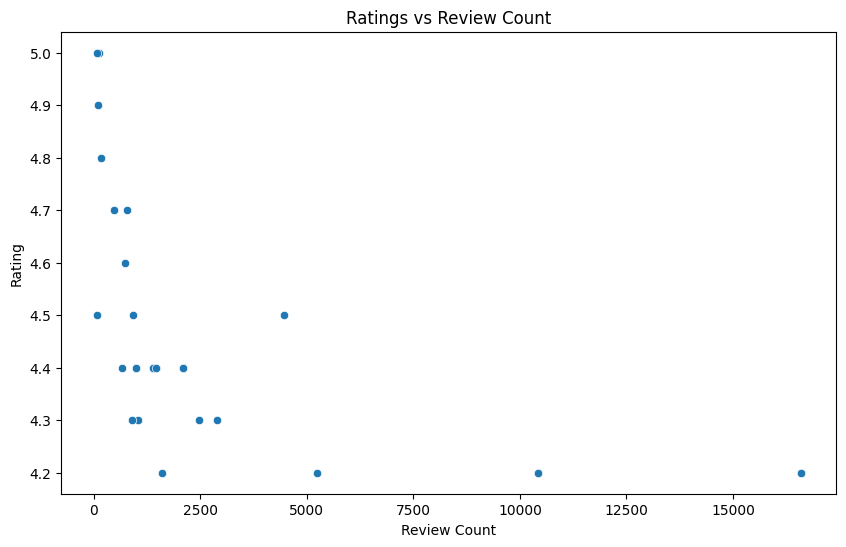

In [44]:
# Scatter plot of Ratings vs Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review Count', y='Ratings')
plt.title('Ratings vs Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

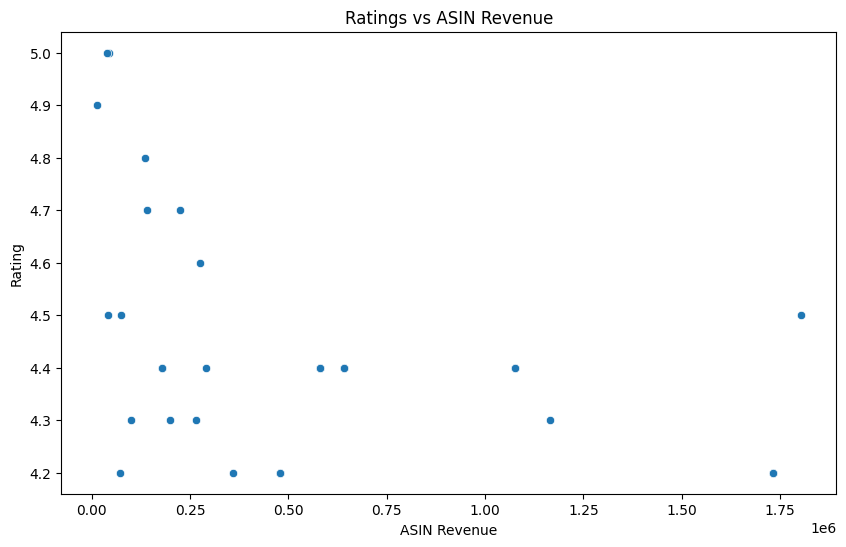

In [45]:
# Scatter plot of Ratings vs ASIN Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ASIN Revenue', y='Ratings')
plt.title('Ratings vs ASIN Revenue')
plt.xlabel('ASIN Revenue')
plt.ylabel('Rating')
plt.show()

In [53]:
np.corrcoef(df['Ratings'], df['ASIN Revenue'])[0, 1]

np.float64(-0.4394220258103766)

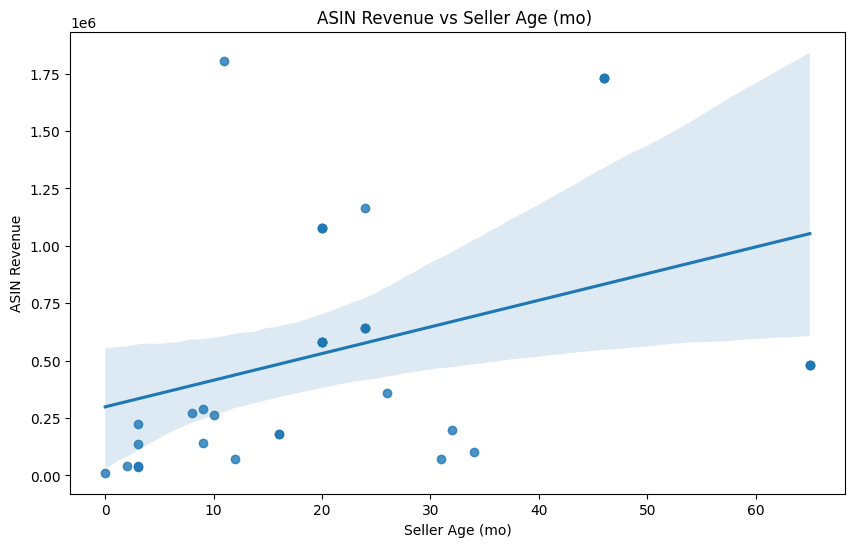

In [46]:
# Scatter plot of Ratings vs ASIN Revenue
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Seller Age (mo)', y='ASIN Revenue')
plt.title('ASIN Revenue vs Seller Age (mo) ')
plt.xlabel('Seller Age (mo)')
plt.ylabel('ASIN Revenue')
plt.show()


In [51]:
# Calculate the correlation coefficient between 'Seller Age (mo)' and 'ASIN Revenue'
correlation = np.corrcoef(df['Seller Age (mo)'], df['ASIN Revenue'])[0, 1]
# Print the correlation coefficient
print(f"The correlation between Seller Age (mo) and ASIN Revenue is: {correlation:.2f}")

The correlation between Seller Age (mo) and ASIN Revenue is: 0.39


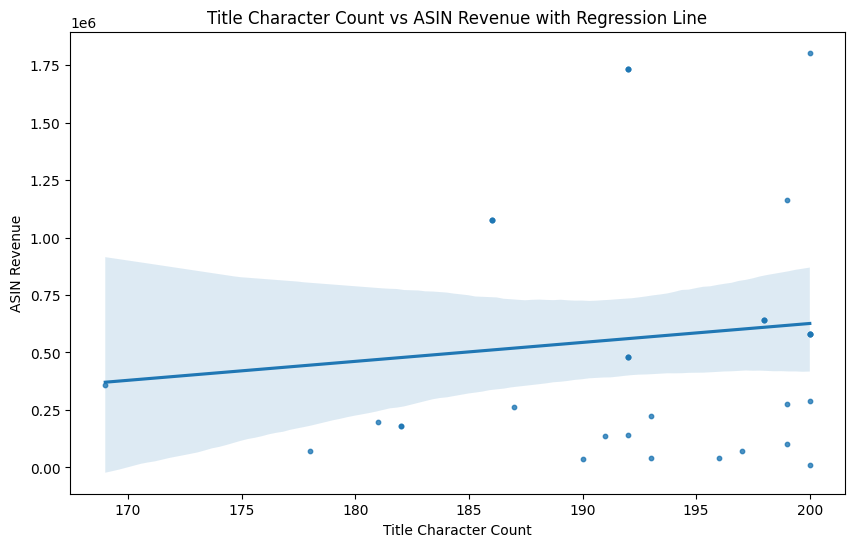

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Title Char. Count', y='ASIN Revenue', scatter_kws={'s':10})
plt.title('Title Character Count vs ASIN Revenue with Regression Line')
plt.xlabel('Title Character Count')
plt.ylabel('ASIN Revenue')
plt.show()

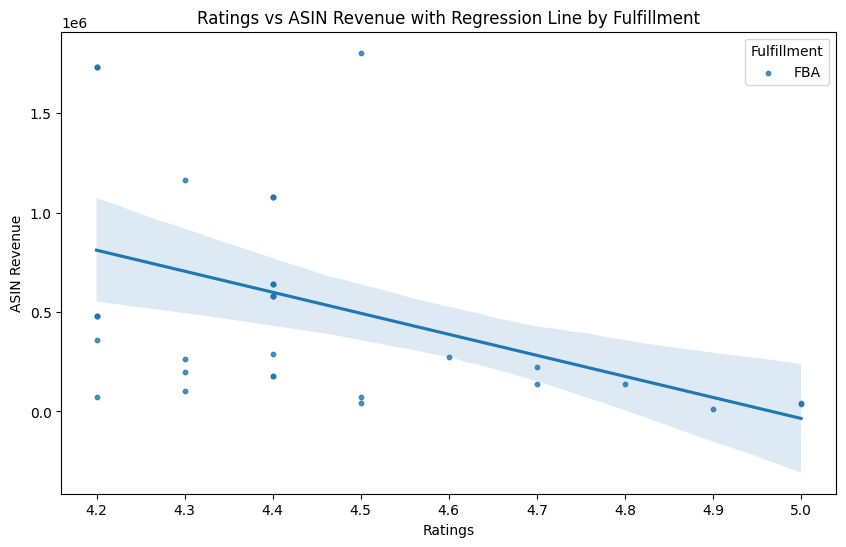

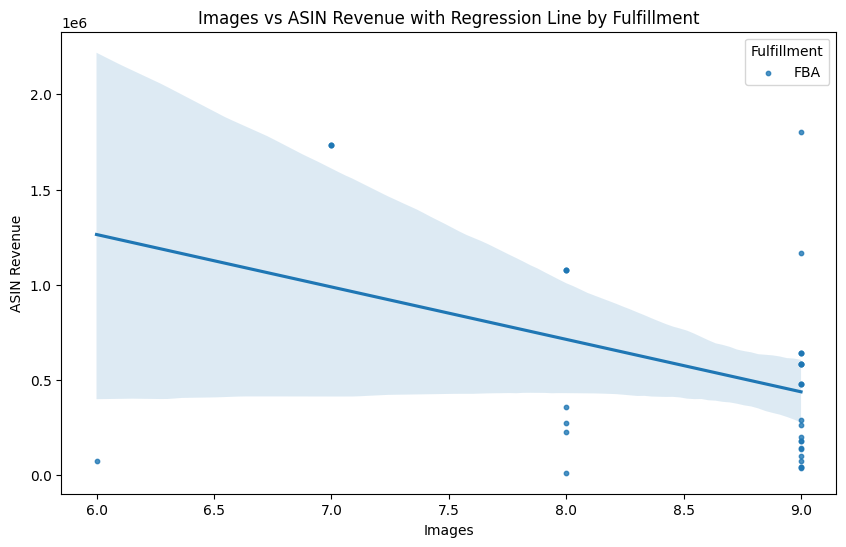

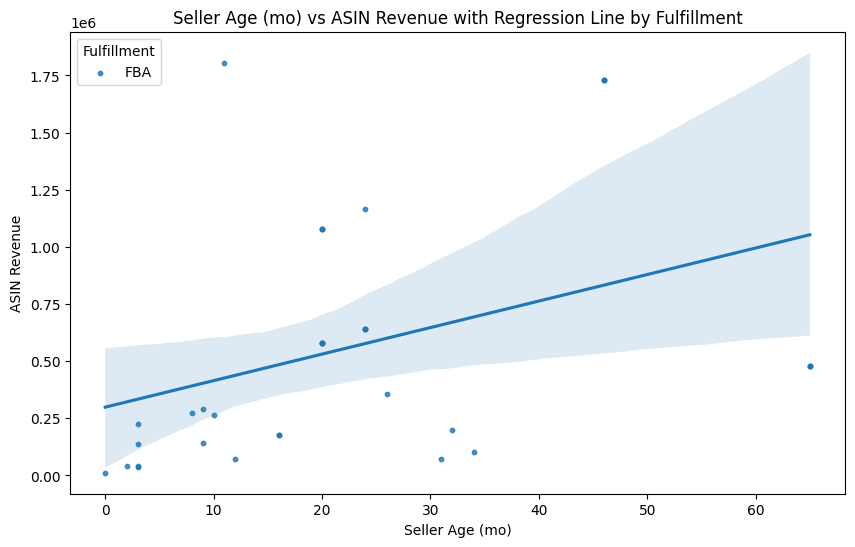

In [ ]:
# Define the x-axis variables
x_vars = ['Ratings', 'Images', 'Seller Age (mo)']
y_var = 'ASIN Revenue'
legend_var = 'Fulfillment'

# Create a loop to generate scatter plots with regression lines for each x-variable and fulfillment type
for x_var in x_vars:
    plt.figure(figsize=(10, 6))
    for fulfillment_type in df[legend_var].unique():
        subset_df = df[df[legend_var] == fulfillment_type]
        sns.regplot(data=subset_df, x=x_var, y=y_var, scatter_kws={'s':10}, label=fulfillment_type)

    plt.title(f'{x_var} vs {y_var} with Regression Line by {legend_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=legend_var)
    plt.show()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)